In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [35]:
train_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [36]:
train_df.shape

(7111, 12)

In [37]:
train_df.isnull().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [38]:
train_df.tail()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8
7110,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,1.4,4.1,186.5


<AxesSubplot:>

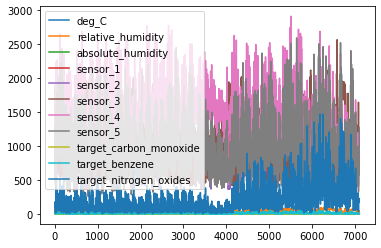

In [7]:
train_df.plot()

In [8]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(train_df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()

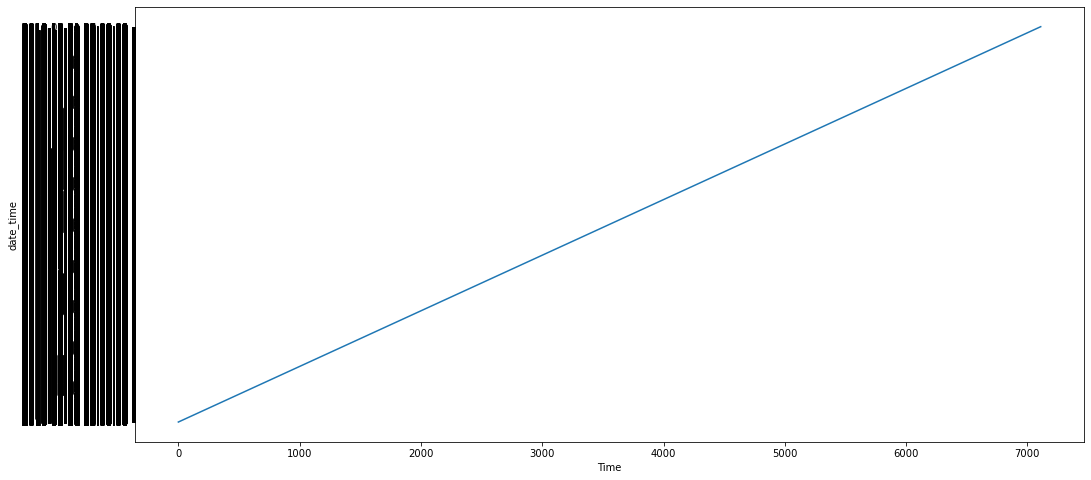

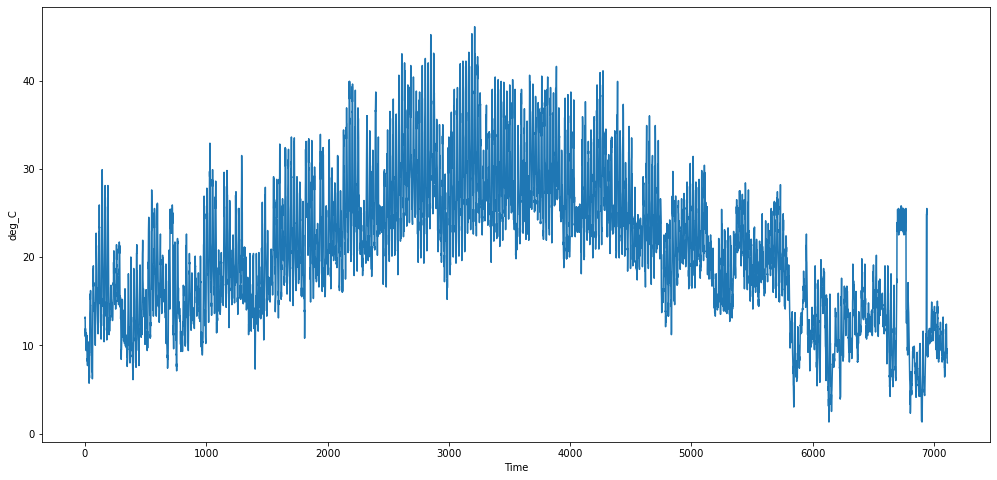

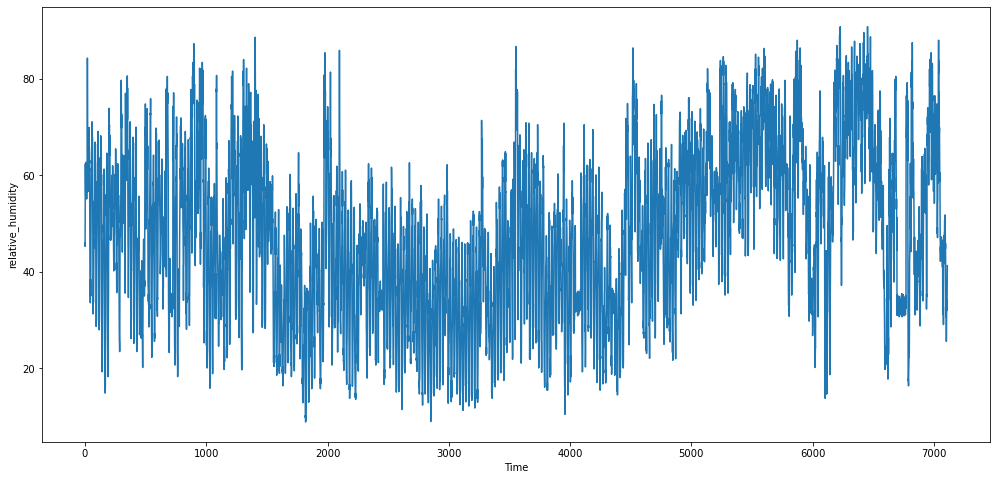

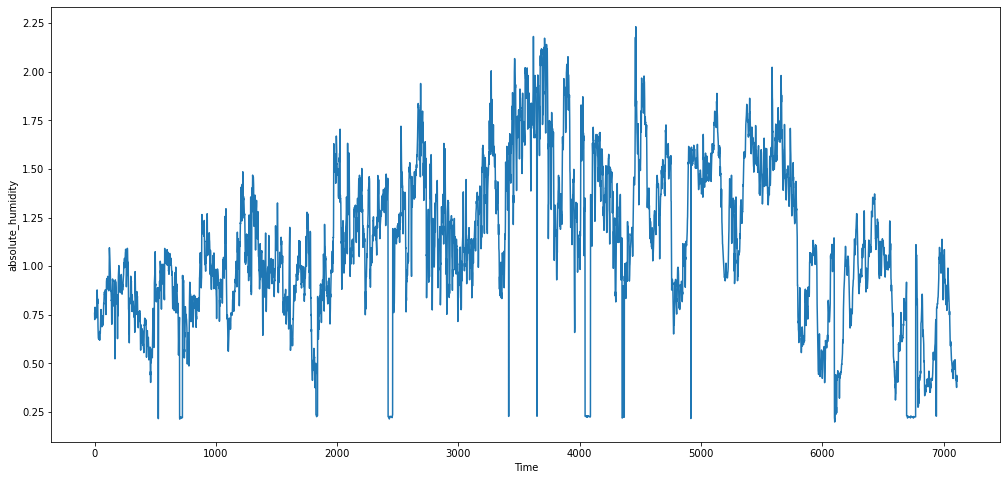

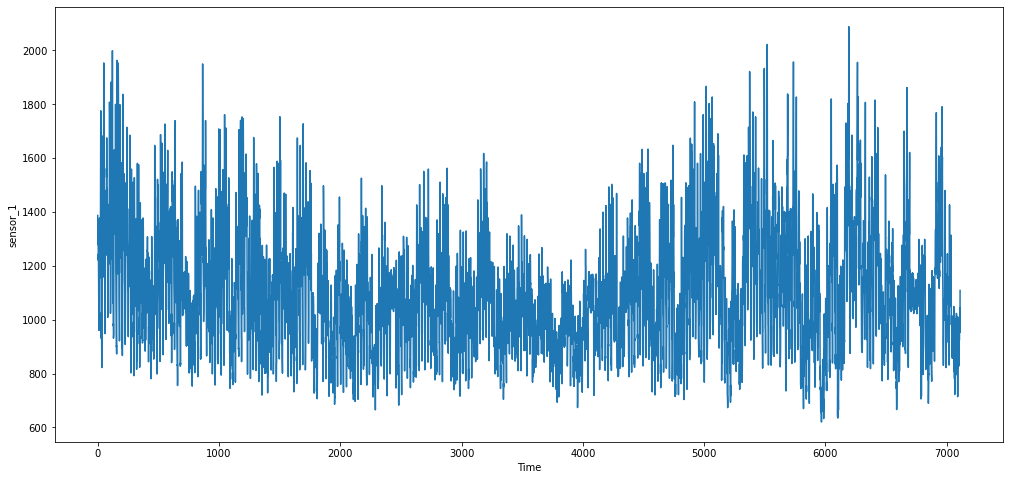

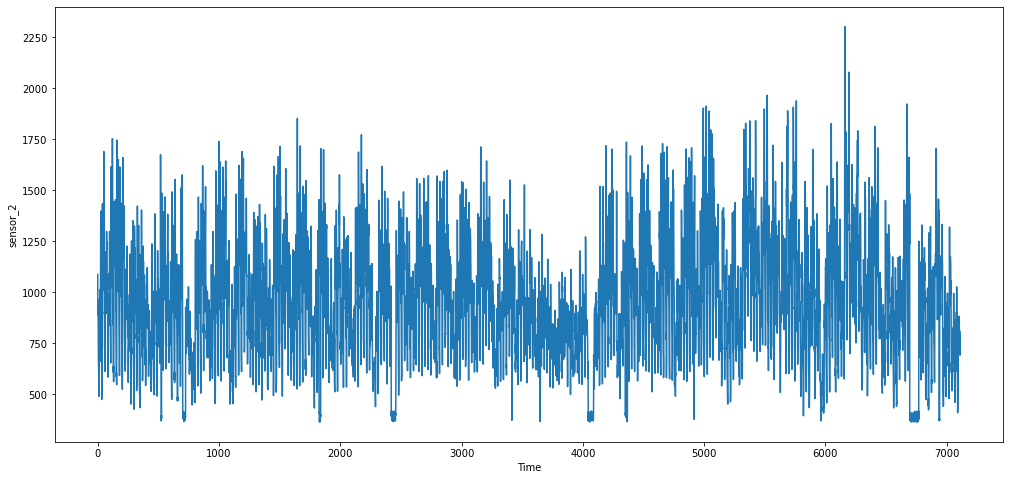

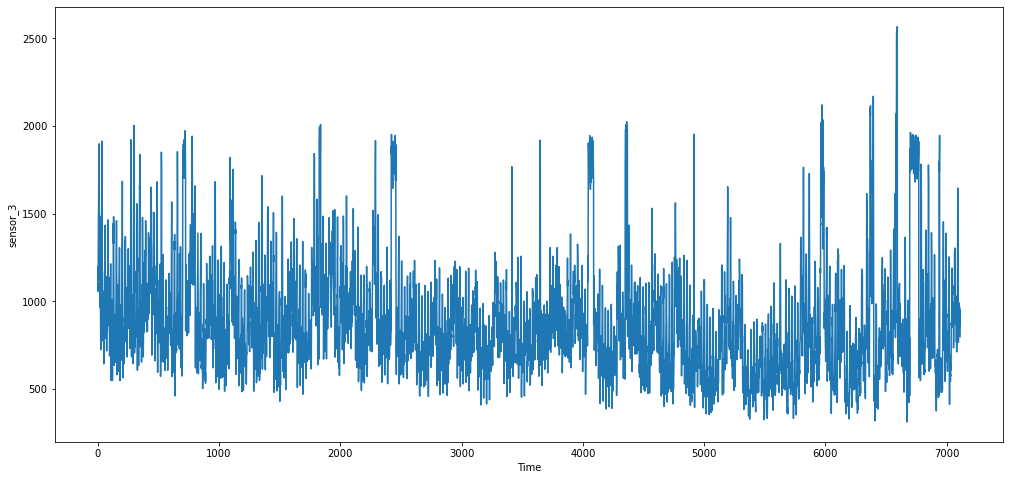

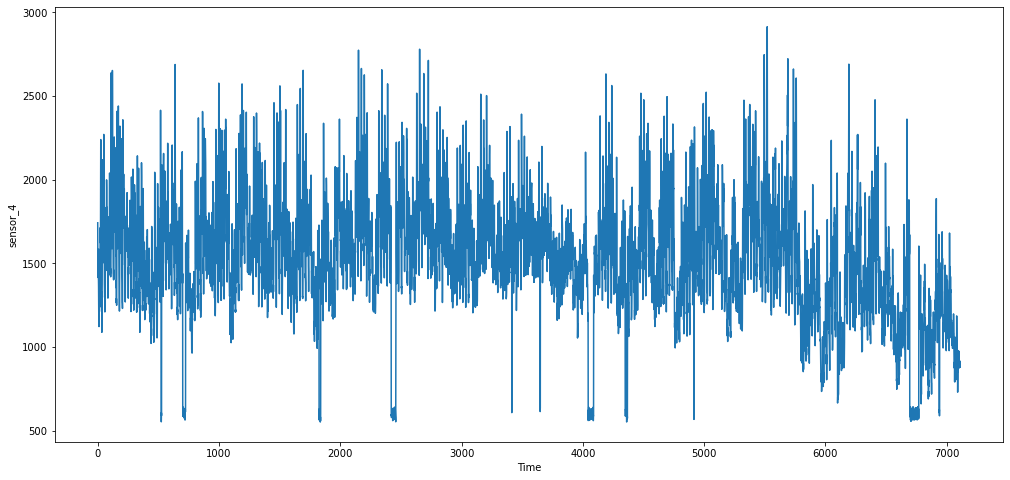

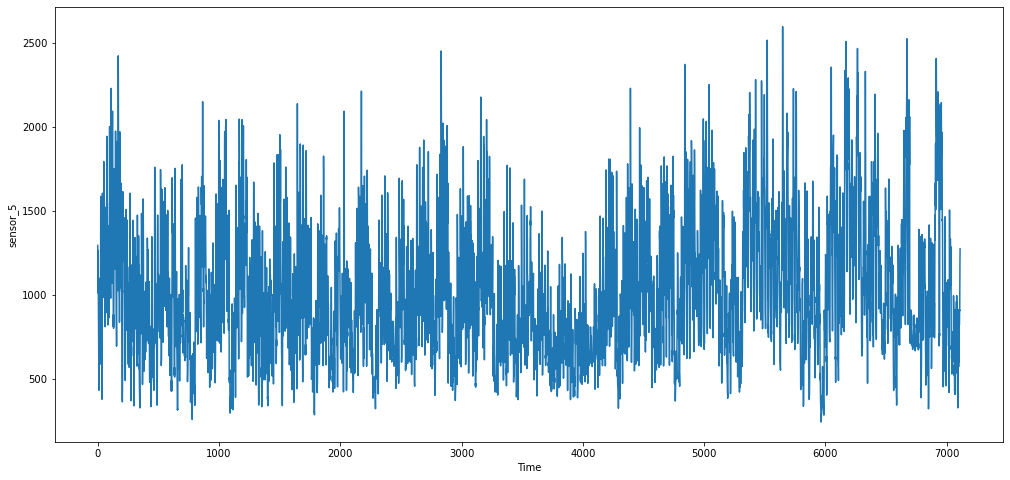

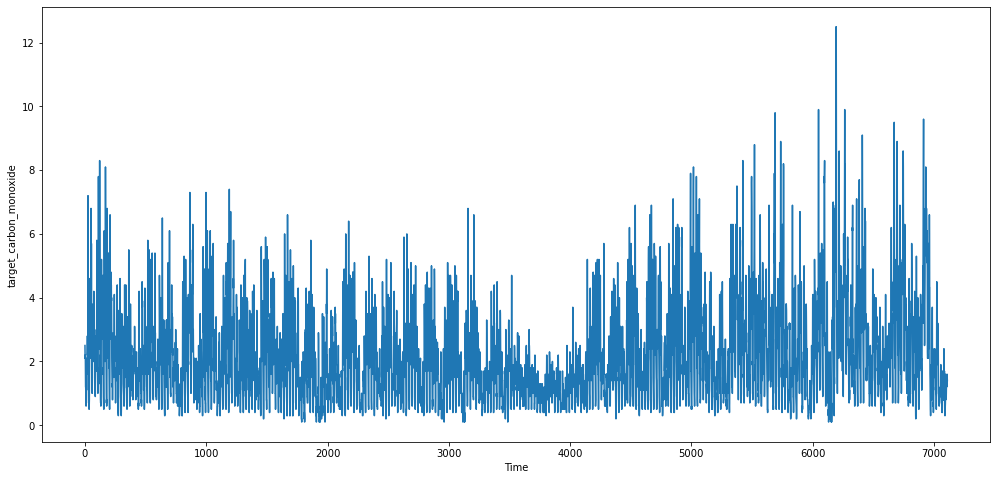

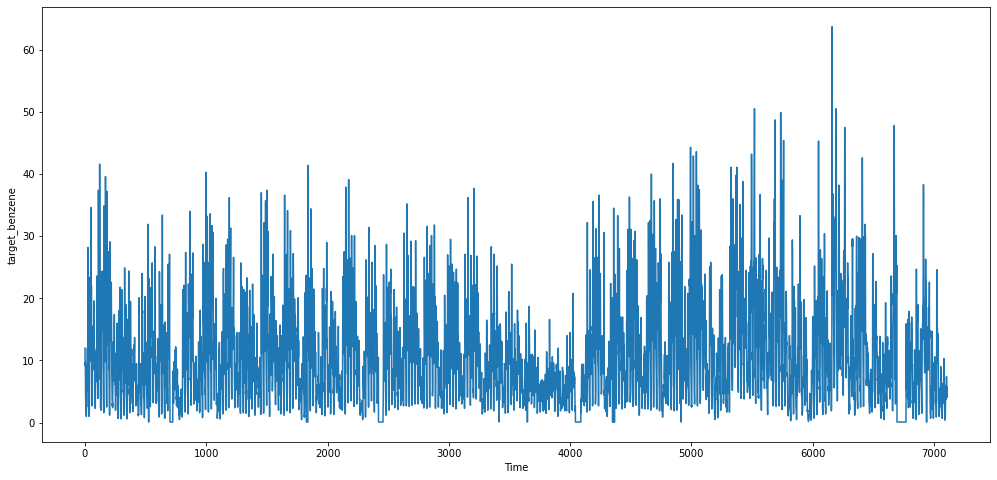

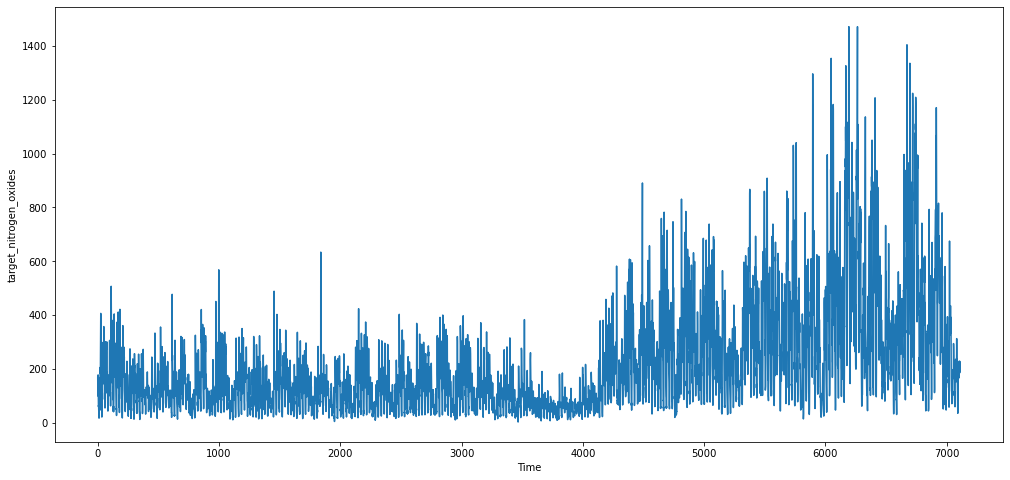

In [9]:
for col in train_df.columns:
    plot_data(col)

In [39]:
df_train= train_df[['date_time','target_carbon_monoxide']].copy()

df_test= test_df[['date_time']].copy()

In [40]:
df_train.head()

,date_time,target_carbon_monoxide
0,2010-03-10 18:00:00,2.5
1,2010-03-10 19:00:00,2.1
2,2010-03-10 20:00:00,2.2
3,2010-03-10 21:00:00,2.2
4,2010-03-10 22:00:00,1.5


In [41]:
df_test.head()

,date_time
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


In [42]:
df_train.head()

,date_time,target_carbon_monoxide
0,2010-03-10 18:00:00,2.5
1,2010-03-10 19:00:00,2.1
2,2010-03-10 20:00:00,2.2
3,2010-03-10 21:00:00,2.2
4,2010-03-10 22:00:00,1.5


<AxesSubplot:>

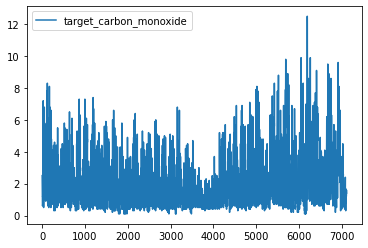

In [43]:
df_train.plot()

# Dickey-fuller Test

In [20]:

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [22]:
test_result=adfuller(df_train['target_carbon_monoxide'])

In [23]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df_train['target_carbon_monoxide'])

ADF Test Statistic : -8.982102584771997
p-value : 7.26341357249666e-15
#Lags Used : 33
Number of Observations Used : 7077
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# fbprophet

In [44]:
from fbprophet import Prophet
df_train.rename(columns={'date_time':'ds',
                     'target_carbon_monoxide':'y'},inplace=True)

In [45]:
df_train

,ds,y
0,2010-03-10 18:00:00,2.5
1,2010-03-10 19:00:00,2.1
2,2010-03-10 20:00:00,2.2
3,2010-03-10 21:00:00,2.2
4,2010-03-10 22:00:00,1.5
...,...,...
7106,2010-12-31 20:00:00,1.3
7107,2010-12-31 21:00:00,1.4
7108,2010-12-31 22:00:00,1.6
7109,2010-12-31 23:00:00,1.5


In [46]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [47]:
df_test.rename(columns={'date_time':'ds'},inplace=True)

In [48]:
df_test

,ds
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
2242,2011-04-04 10:00:00
2243,2011-04-04 11:00:00
2244,2011-04-04 12:00:00
2245,2011-04-04 13:00:00


In [56]:
target_carbon_monoxide_predict = model.predict(df_test)

In [57]:
target_carbon_monoxide_predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01 00:00:00,2.508627,0.801328,3.486885,2.508627,2.508627,-0.337431,-0.337431,-0.337431,-0.496068,-0.496068,-0.496068,0.158637,0.158637,0.158637,0.0,0.0,0.0,2.171196
1,2011-01-01 01:00:00,2.508533,0.813888,3.458926,2.508533,2.508533,-0.439182,-0.439182,-0.439182,-0.568043,-0.568043,-0.568043,0.128861,0.128861,0.128861,0.0,0.0,0.0,2.069351
2,2011-01-01 02:00:00,2.508438,0.350399,2.973752,2.508438,2.508438,-0.798503,-0.798503,-0.798503,-0.896323,-0.896323,-0.896323,0.097821,0.097821,0.097821,0.0,0.0,0.0,1.709936
3,2011-01-01 03:00:00,2.508344,-0.238550,2.508083,2.508344,2.508344,-1.322337,-1.322337,-1.322337,-1.387963,-1.387963,-1.387963,0.065626,0.065626,0.065626,0.0,0.0,0.0,1.186007
4,2011-01-01 04:00:00,2.508250,-0.565575,2.128278,2.508250,2.508250,-1.648074,-1.648074,-1.648074,-1.680474,-1.680474,-1.680474,0.032400,0.032400,0.032400,0.0,0.0,0.0,0.860176


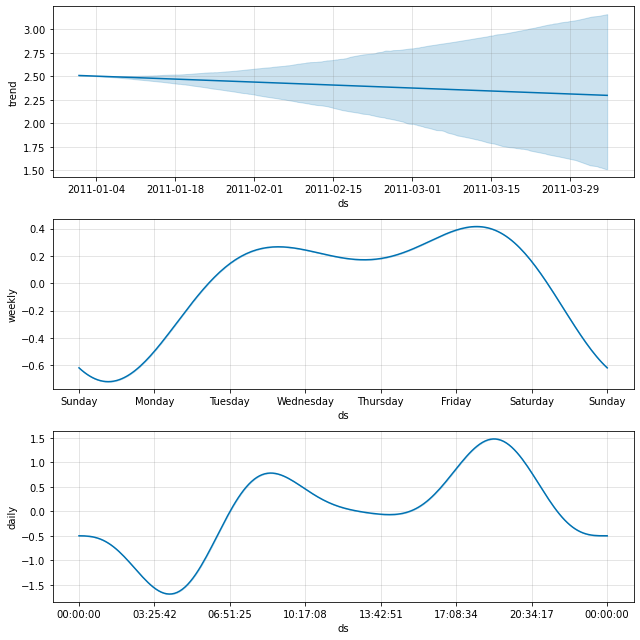

In [58]:
fig = model.plot_components(target_carbon_monoxide_predict)

In [61]:
target_carbon_monoxide_predict=target_carbon_monoxide_predict[["ds","trend"]]

In [73]:
target_carbon_monoxide_predict.head()

,ds,target_carbon_monoxide
0,2011-01-01 00:00:00,2.508627
1,2011-01-01 01:00:00,2.508533
2,2011-01-01 02:00:00,2.508438
3,2011-01-01 03:00:00,2.508344
4,2011-01-01 04:00:00,2.508250


In [64]:
target_carbon_monoxide_predict.rename(columns={'trend':'target_carbon_monoxide'},inplace=True)

In [65]:
target_carbon_monoxide_predict.head()

,ds,target_carbon_monoxide
0,2011-01-01 00:00:00,2.508627
1,2011-01-01 01:00:00,2.508533
2,2011-01-01 02:00:00,2.508438
3,2011-01-01 03:00:00,2.508344
4,2011-01-01 04:00:00,2.508250


In [66]:
df_train_C6H6 = train_df[['date_time','target_benzene']].copy()
df_train_NO = train_df[['date_time','target_nitrogen_oxides']].copy()

In [69]:
df_train_C6H6.rename(columns={'date_time':'ds',
                     'target_benzene':'y'},inplace=True)

df_train_NO.rename(columns={'date_time':'ds',
                     'target_nitrogen_oxides':'y'},inplace=True)

In [70]:
target_benzene_predict = model.predict(df_test)
target_nitrogen_oxides_predict = model.predict(df_test)

In [83]:
target_benzene_predict.head()

,ds,target_benzene
0,2011-01-01 00:00:00,2.508627
1,2011-01-01 01:00:00,2.508533
2,2011-01-01 02:00:00,2.508438
3,2011-01-01 03:00:00,2.508344
4,2011-01-01 04:00:00,2.508250


In [72]:
target_nitrogen_oxides_predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01 00:00:00,2.508627,0.748832,3.599853,2.508627,2.508627,-0.337431,-0.337431,-0.337431,-0.496068,-0.496068,-0.496068,0.158637,0.158637,0.158637,0.0,0.0,0.0,2.171196
1,2011-01-01 01:00:00,2.508533,0.728122,3.413955,2.508533,2.508533,-0.439182,-0.439182,-0.439182,-0.568043,-0.568043,-0.568043,0.128861,0.128861,0.128861,0.0,0.0,0.0,2.069351
2,2011-01-01 02:00:00,2.508438,0.310111,3.063562,2.508438,2.508438,-0.798503,-0.798503,-0.798503,-0.896323,-0.896323,-0.896323,0.097821,0.097821,0.097821,0.0,0.0,0.0,1.709936
3,2011-01-01 03:00:00,2.508344,-0.246867,2.566286,2.508344,2.508344,-1.322337,-1.322337,-1.322337,-1.387963,-1.387963,-1.387963,0.065626,0.065626,0.065626,0.0,0.0,0.0,1.186007
4,2011-01-01 04:00:00,2.508250,-0.440262,2.161596,2.508250,2.508250,-1.648074,-1.648074,-1.648074,-1.680474,-1.680474,-1.680474,0.032400,0.032400,0.032400,0.0,0.0,0.0,0.860176


In [74]:
target_benzene_predict=target_benzene_predict[["ds","trend"]]
target_nitrogen_oxides_predict=target_nitrogen_oxides_predict[["ds","trend"]]

In [75]:
target_benzene_predict.rename(columns={'trend':'target_benzene'},inplace=True)
target_nitrogen_oxides_predict.rename(columns={'trend':'target_nitrogen_oxides'},inplace=True)

In [76]:
target_nitrogen_oxides_predict.head()

,ds,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.508627
1,2011-01-01 01:00:00,2.508533
2,2011-01-01 02:00:00,2.508438
3,2011-01-01 03:00:00,2.508344
4,2011-01-01 04:00:00,2.508250


In [77]:
df_1 = pd.merge(target_carbon_monoxide_predict,target_benzene_predict,on=['ds'])

In [78]:
df_1.head()

,ds,target_carbon_monoxide,target_benzene
0,2011-01-01 00:00:00,2.508627,2.508627
1,2011-01-01 01:00:00,2.508533,2.508533
2,2011-01-01 02:00:00,2.508438,2.508438
3,2011-01-01 03:00:00,2.508344,2.508344
4,2011-01-01 04:00:00,2.508250,2.508250


In [79]:
df_1.isnull().sum()

ds                        0
target_carbon_monoxide    0
target_benzene            0
dtype: int64

In [80]:
df_2 = pd.merge(df_1,target_nitrogen_oxides_predict,on=['ds'])

In [81]:
df_2.head()

,ds,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.508627,2.508627,2.508627
1,2011-01-01 01:00:00,2.508533,2.508533,2.508533
2,2011-01-01 02:00:00,2.508438,2.508438,2.508438
3,2011-01-01 03:00:00,2.508344,2.508344,2.508344
4,2011-01-01 04:00:00,2.508250,2.508250,2.508250


In [87]:
df_2.rename(columns={'ds':'date_time'},inplace=True)

In [84]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [89]:
df_2.to_csv('sample_submission.csv',index=False)